In [1]:
import pandas as pd
import os
import glob
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
# see https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Quickstart.ipynb
import folium
print(folium.__version__)
from folium.plugins import MarkerCluster
from folium import IFrame

%matplotlib inline


C:\Users\Hachem\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\Hachem\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0.12.1.post1


## Apartment BUY

In [2]:
path = os.path.join(os.getcwd(), "Data/Apartment/Buy/")
list_of_files = glob.glob(f"{path}/*.csv") 

In [3]:
list_df = []

for filename in list_of_files:
    df = pd.read_csv(filename, sep=";",index_col=None, header=0)
    list_df.append(df)

df_total = pd.concat(list_df, axis=0, ignore_index=True)

In [4]:
df_total.head()

,ID,url,creation,Haus/Wohnung,address,city,postcode,quarter,firstname,lastname,...,livingSpace,balcony,builtInKitchen,garden,price,privateOffer,floorplan,guestToilet,lat,lon
0,126146182,https://www.immobilienscout24.de/expose/126146182,2022-01-16T21:50:18.000+01:00,Wohnung,"Fritz-Walter-Strasse 7, Neufahrn bei Freising,...",Freising (Kreis),85375,Neufahrn bei Freising,Romiana,Stegschuster,...,86.46,True,True,False,639000 EUR,True,True,True,48.31358,11.65721
1,128504107,https://www.immobilienscout24.de/expose/128504107,2022-01-16T21:45:34.000+01:00,Wohnung,"Jüchen, Neuss (Rhein-Kreis)",Neuss (Rhein-Kreis),41363,Jüchen,c/o Hr. Alexander,Zorin,...,97.00,True,False,False,225000 EUR,True,True,True,no value,no value
2,131382761,https://www.immobilienscout24.de/expose/131382761,2022-01-16T21:42:26.000+01:00,Wohnung,"Knittkuhl, Düsseldorf",Düsseldorf,40629,Hubbelrath,Miriam,Sinatra,...,98.00,True,True,False,385000 EUR,True,True,True,no value,no value
3,131382043,https://www.immobilienscout24.de/expose/131382043,2022-01-16T21:06:53.000+01:00,Wohnung,"Schweinheim, Aschaffenburg",Aschaffenburg,63743,Schweinheim,Zafer,Urgun,...,92.00,True,True,False,350000 EUR,True,False,True,no value,no value
4,131382233,https://www.immobilienscout24.de/expose/131382233,2022-01-16T21:06:02.000+01:00,Wohnung,"Schleißheimerstraße 13a, Garching bei München,...",München (Kreis),85748,Garching bei München,Thomas,Jakob,...,70.00,False,False,True,330000 EUR,True,True,False,48.24931,11.6484


In [5]:
for i in list(df_total.columns):
    df_total=df_total[df_total[i]!="no value"]

In [6]:
df_total.groupby("city").size().sort_values(ascending=False)


city
Berlin                   1317
München                   228
Leipzig                   136
Frankfurt am Main         120
Köln                      119
                         ... 
Tirschenreuth (Kreis)       1
Fulda (Kreis)               1
Coburg (Kreis)              1
Parchim (Kreis)             1
Müritz (Kreis)              1
Length: 360, dtype: int64

In [7]:
df_total.groupby("company").size().sort_values(ascending=False)


company
AZ Agentur für Zwangsversteigerungsinformationen GmbH    770
Vonovia SE-Selbstständiger Vertriebspartner              181
Ziegert EverEstate GmbH                                  145
Home Estate 360 GmbH                                     104
Best Place Living GmbH                                    99
                                                        ... 
Ihr Maklerhaus                                             1
Ideal-Bau Grundbesitz GmbH                                 1
IZB Immobilien Zentrum Bayern GmbH                         1
IWI Immobilien                                             1
wpi Wohn&ProjektImmobilien oHG                             1
Length: 1778, dtype: int64

In [8]:
df_total['price']=df_total['price'].apply(lambda x: float(x.split(" EUR")[0]))

In [9]:
df_total.dropna(inplace=True)

In [10]:
def draw_city_totalarea(city):
    df3=df_total[df_total['city']==city]
    df3.plot(x="livingSpace", y="price", c="livingSpace", kind="scatter", colormap=cm.Set1, figsize=(15,10))

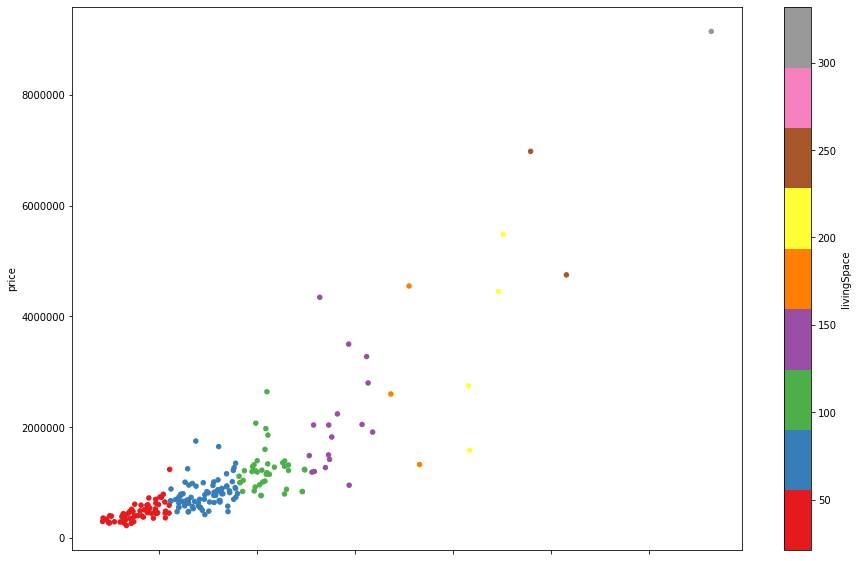

In [11]:
draw_city_totalarea("München")

In [12]:
df_price_square=df_total[['city','price','livingSpace']].groupby("city").mean()

In [13]:
df_price_square["euro/meter square"] = df_price_square["price"].div(df_price_square["livingSpace"].values)


In [14]:
df_price_square.head()

,price,livingSpace,euro/meter square
city,,,
Aachen,302125.000000,81.277500,3717.203408
Aachen (Kreis),135178.125000,73.300625,1844.160606
Aichach-Friedberg (Kreis),548446.400000,93.980000,5835.777825
Alb-Donau-Kreis,335666.666667,88.136667,3808.479256
Altenburger Land (Kreis),63000.000000,50.860000,1238.694455


In [15]:
df_price_square[['euro/meter square']].sort_values(by=["euro/meter square"], ascending=False)

,euro/meter square
city,
Friesland (Kreis),14308.725372
Miesbach (Kreis),13356.067954
München,12639.113128
Frankfurt am Main,10462.618553
Starnberg (Kreis),10455.107318
...,...
Waldeck-Frankenberg (Kreis),290.967742
Wunsiedel im Fichtelgebirge (Kreis),278.914094
Kronach (Kreis),232.000000


In [16]:
df_total_2=df_total[df_total['city']=="Passau"]

In [17]:
m = folium.Map(location=[48.566846, 13.436720], zoom_start=13, tiles="Stamen Terrain")

tooltip = "Click me!"

for index,row in enumerate(df_total_2.itertuples()):
    html='''{0}. <a target="_blank" href="{1}">{2}</a> </br>
    {3} </br>
    Price: {4:.2f} euro '''.format(index, row.url, row.title, row.address, row.price)
    folium.Marker([row.lat, row.lon], popup=html, tooltip=tooltip).add_to(m)

m

## Haus BUY

In [18]:
path = os.path.join(os.getcwd(), "Data/House/Buy/")
list_of_files = glob.glob(f"{path}/*.csv") 

In [19]:
list_df = []

for filename in list_of_files:
    df = pd.read_csv(filename, sep=";",index_col=None, header=0)
    list_df.append(df)

df_total = pd.concat(list_df, axis=0, ignore_index=True)

In [20]:
df_total.head()

,ID,url,creation,Haus/Wohnung,address,city,postcode,quarter,firstname,lastname,...,title,guestToilet,numberOfRooms,livingSpace,plotArea,price,privateOffer,lat,lon,floorplan
0,129881517,https://www.immobilienscout24.de/expose/129881517,2022-01-16T21:43:17.000+01:00,Haus,"Affalterbach, Ludwigsburg (Kreis)",Ludwigsburg (Kreis),71563,Affalterbach,Rita Ilona,Raiser,...,Gemütliches Reihenmittelhaus mit sechs Zimmern...,True,6.0,159.0,230.0,520000 EUR,True,no value,no value,True
1,131381879,https://www.immobilienscout24.de/expose/131381879,2022-01-16T21:34:28.000+01:00,Haus,"Buckenberg, Pforzheim",Pforzheim,75175,Buckenberg,T.,Ruhland,...,Besondere Doppelhaushälfte zwischen Karlsruhe ...,True,4.0,139.0,414.0,560000 EUR,True,no value,no value,False
2,131382584,https://www.immobilienscout24.de/expose/131382584,2022-01-16T21:30:53.000+01:00,Haus,"Erkelenzer Straße 24, Hückelhoven, Heinsberg (...",Heinsberg (Kreis),41836,Hückelhoven,René,Rohmann,...,"Haus, Hof, Pool & Hühner",True,4.0,165.0,900.0,495000 EUR,True,51.07744,6.22457,False
3,131234429,https://www.immobilienscout24.de/expose/131234429,2022-01-16T21:25:59.000+01:00,Haus,"Döhren, Hannover",Hannover,30519,Döhren,no value,/ R.S,...,Einfamilienhaus zu verkaufen,True,6.0,176.0,340.0,1188000 EUR,True,no value,no value,False
4,131172234,https://www.immobilienscout24.de/expose/131172234,2022-01-16T21:25:00.000+01:00,Haus,"Garmisch-Partenkirchen, Garmisch-Partenkirchen...",Garmisch-Partenkirchen (Kreis),82467,Garmisch-Partenkirchen,Isabelle,Zwerger,...,"Mehrfamilienhaus, 5 Whg. in sonniger besonders...",False,16.0,469.0,1163.0,4380000 EUR,False,no value,no value,True


In [21]:
df_total.columns

Index(['ID', 'url', 'creation', 'Haus/Wohnung', 'address', 'city', 'postcode',
       'quarter', 'firstname', 'lastname', 'phoneNumber', 'company', 'title',
       'guestToilet', 'numberOfRooms', 'livingSpace', 'plotArea', 'price',
       'privateOffer', 'lat', 'lon', 'floorplan'],
      dtype='object')

In [22]:
for i in list(df_total.columns):
    df_total=df_total[df_total[i]!="no value"]

In [23]:
df_total.groupby("city").size().sort_values(ascending=False)


city
Berlin                   86
Kleve (Kreis)            46
Erzgebirgskreis          45
Hannover (Kreis)         41
Mittelsachsen (Kreis)    35
                         ..
Kelheim (Kreis)           1
Pirmasens                 1
Passau                    1
Erlangen                  1
Erding (Kreis)            1
Length: 389, dtype: int64

In [24]:
df_total.groupby("company").size().sort_values(ascending=False)


company
AZ Agentur für Zwangsversteigerungsinformationen GmbH                       1401
Inseriert auf ohne-makler.net                                                 55
H. Schwarzlose Immobilien                                                     24
M&F Immobilien GmbH                                                           22
Ziegert EverEstate GmbH                                                       15
                                                                            ... 
Dipl. Ing. Weber Massivhaus Gesellschaft für schlüsselfertiges Bauen mbH       1
Dinges Finanzmanagement                                                        1
LIV Management GmbH                                                            1
Detlef Hein | DETLEF HEIN immobilien                                           1
Kai Arnold Immobilien IVD                                                      1
Length: 1212, dtype: int64

In [25]:
df_total['price']=df_total['price'].apply(lambda x: float(x.split(" EUR")[0]))

In [26]:
df_total.dropna(inplace=True)

In [27]:
def draw_city_totalarea(city):
    df3=df_total[df_total['city']==city]
    df3.plot(x="livingSpace", y="price", c="livingSpace", kind="scatter", colormap=cm.Set1, figsize=(15,10))

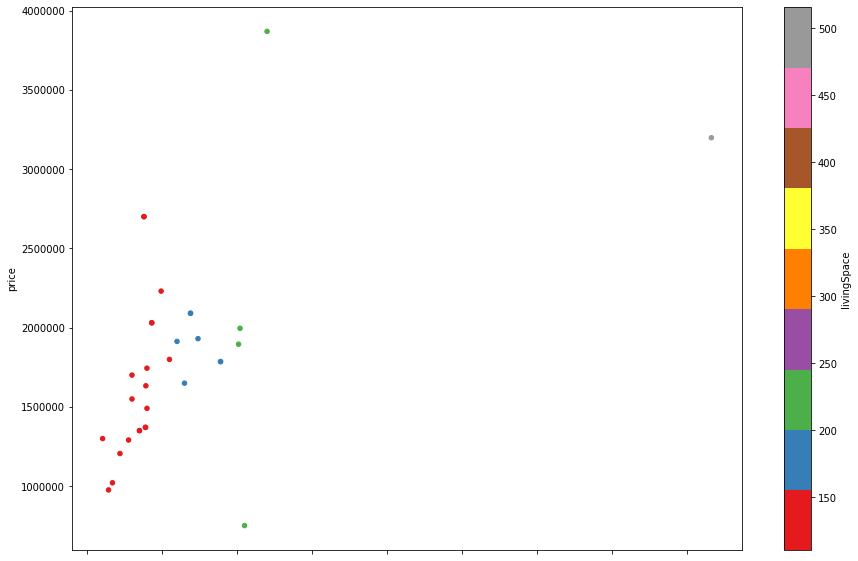

In [28]:
draw_city_totalarea("München")

In [29]:
df_price_square=df_total[['city','price','livingSpace']].groupby("city").mean()

In [30]:
df_price_square["euro/meter square"] = df_price_square["price"].div(df_price_square["livingSpace"].values)


In [31]:
df_price_square.head()

,price,livingSpace,euro/meter square
city,,,
Aachen,8.166667e+05,221.333333,3689.759036
Aachen (Kreis),3.725314e+05,213.723143,1743.056103
Ahrweiler (Kreis),2.638570e+05,222.348571,1186.681787
Aichach-Friedberg (Kreis),1.008143e+06,185.581429,5432.347756
Alb-Donau-Kreis,8.599000e+05,121.000000,7106.611570


In [32]:
df_price_square[['euro/meter square']].sort_values(by=["euro/meter square"], ascending=False)

,euro/meter square
city,
Bad Tölz-Wolfratshausen (Kreis),13500.000000
Potsdam,11257.506730
München,11017.054685
Erding (Kreis),10782.892352
München (Kreis),9722.463140
...,...
Holzminden (Kreis),419.701700
Weißenburg-Gunzenhausen (Kreis),355.345912
Görlitz,251.185880


In [33]:
df_total_2=df_total[df_total['city']=="Passau"]

In [34]:
df_total_2.head()

,ID,url,creation,Haus/Wohnung,address,city,postcode,quarter,firstname,lastname,...,title,guestToilet,numberOfRooms,livingSpace,plotArea,price,privateOffer,lat,lon,floorplan
10874,130981775,https://www.immobilienscout24.de/expose/130981775,2021-12-18T18:32:06.000+01:00,Haus,"Alte Poststrasse 10, Neustift, Passau",Passau,94036,Heining,Armin,Ernst,...,NEUBAU Baubiologisches Holzhaus in Naturnahe...,True,4.0,146.75,516.86,719900.0,False,48.57265,13.38914,False


In [35]:
m = folium.Map(location=[48.566846, 13.436720], zoom_start=13, tiles="Stamen Terrain")

tooltip = "Click me!"

for index,row in enumerate(df_total_2.itertuples()):
    html='''{0}. <a target="_blank" href="{1}">{2}</a> </br>
    {3} </br>
    Price: {4:.2f} euro '''.format(index, row.url, row.title, row.address, row.price)
    folium.Marker([row.lat, row.lon], popup=html, tooltip=tooltip).add_to(m)

m

## Apartment Rent

In [36]:
path = os.path.join(os.getcwd(), "Data/Apartment/Rent/")
list_of_files = glob.glob(f"{path}/*.csv") 

In [37]:
list_df = []

for filename in list_of_files:
    df = pd.read_csv(filename, sep=";",index_col=None, header=0)
    list_df.append(df)

df_total = pd.concat(list_df, axis=0, ignore_index=True)

In [38]:
df_total.head()

,ID,url,creation,Haus/Wohnung,address,city,postcode,quarter,firstname,lastname,...,livingSpace,balcony,builtInKitchen,garden,price,privateOffer,floorplan,Warm_miete,lat,lon
0,86151756,https://www.immobilienscout24.de/expose/86151756,2022-01-16T21:19:49.512+01:00,Wohnung,"Gaulnhofer Straße 6d, Katzwang, Reichelsdorf O...",Nürnberg,90455,"Katzwang, Reichelsdorf Ost, Reichelsdorfer Keller",Elke,Helm,...,75.0,True,True,False,945 EUR,True,True,1220 EUR/MONTH,49.35151,11.05835
1,126255876,https://www.immobilienscout24.de/expose/126255876,2022-01-16T21:19:17.000+01:00,Wohnung,"Bühler Str. 1, Rohrbach, Heidelberg",Heidelberg,69126,Rohrbach,Marcel,Schwebler,...,105.0,True,True,False,1300 EUR,True,True,1650 EUR/MONTH,49.37481,8.68196
2,131175257,https://www.immobilienscout24.de/expose/131175257,2022-01-16T21:18:54.000+01:00,Wohnung,"Glockenhofstraße 26, Glockenhof, Nürnberg",Nürnberg,90478,Glockenhof,Miriam,Meinardus,...,56.0,False,True,False,720 EUR,True,False,850 EUR/MONTH,49.44432,11.09006
3,131381911,https://www.immobilienscout24.de/expose/131381911,2022-01-16T21:17:01.000+01:00,Wohnung,"Uhlandstr. 2, Karlsbad, Karlsruhe (Kreis)",Karlsruhe (Kreis),76307,Karlsbad,Yi,Xie,...,52.0,False,False,False,450 EUR,True,True,600 EUR/MONTH,48.91353,8.50201
4,131382054,https://www.immobilienscout24.de/expose/131382054,2022-01-16T21:16:40.000+01:00,Wohnung,"Lange Straße 47, Wehringhausen, Hagen",Hagen,58089,Wehringhausen,Michael,Fidelak,...,61.0,False,True,False,305 EUR,True,True,395 EUR/MONTH,51.35506,7.46018


In [39]:
df_total.columns

Index(['ID', 'url', 'creation', 'Haus/Wohnung', 'address', 'city', 'postcode',
       'quarter', 'firstname', 'lastname', 'phoneNumber', 'company', 'title',
       'numberOfRooms', 'livingSpace', 'balcony', 'builtInKitchen', 'garden',
       'price', 'privateOffer', 'floorplan', 'Warm_miete', 'lat', 'lon'],
      dtype='object')

In [40]:
for i in list(df_total.columns):
    df_total=df_total[df_total[i]!="no value"]

In [41]:
df_total.groupby("city").size().sort_values(ascending=False)


city
Chemnitz                       2754
Dresden                        1303
Leipzig                        1207
Magdeburg                      1189
Halle (Saale)                  1015
                               ... 
Weiden in der Oberpfalz           1
Günzburg (Kreis)                  1
Bad Dürkheim (Kreis)              1
Südliche Weinstraße (Kreis)       1
Ansbach                           1
Length: 412, dtype: int64

In [42]:
df_total.groupby("company").size().sort_values(ascending=False)


company
Vonovia SE                                       1664
TAG Wohnen & Service GmbH                         931
Immo Checker                                      515
GCP - Grand City Property                         386
Wohnungsbaugesellschaft Plauen mbH                344
                                                 ... 
Immobilienfonds Objekt Rathenow GmbH & Co. KG       1
Immobilienforum Esslingen Bürogemeinschaft          1
Immobilienkontor Berlin IK GmbH                     1
Immobilienkontor Frankfurt                          1
Öffentliche Facility Management GmbH                1
Length: 4628, dtype: int64

In [43]:
df_total.columns

Index(['ID', 'url', 'creation', 'Haus/Wohnung', 'address', 'city', 'postcode',
       'quarter', 'firstname', 'lastname', 'phoneNumber', 'company', 'title',
       'numberOfRooms', 'livingSpace', 'balcony', 'builtInKitchen', 'garden',
       'price', 'privateOffer', 'floorplan', 'Warm_miete', 'lat', 'lon'],
      dtype='object')

In [44]:
df_total['price']=df_total['price'].apply(lambda x: float(x.split(" EUR")[0]))

In [45]:
df_total.dropna(inplace=True)

In [46]:
def draw_city_totalarea(city):
    df3=df_total[df_total['city']==city]
    df3.plot(x="livingSpace", y="price", c="livingSpace", kind="scatter", colormap=cm.Set1, figsize=(15,10))

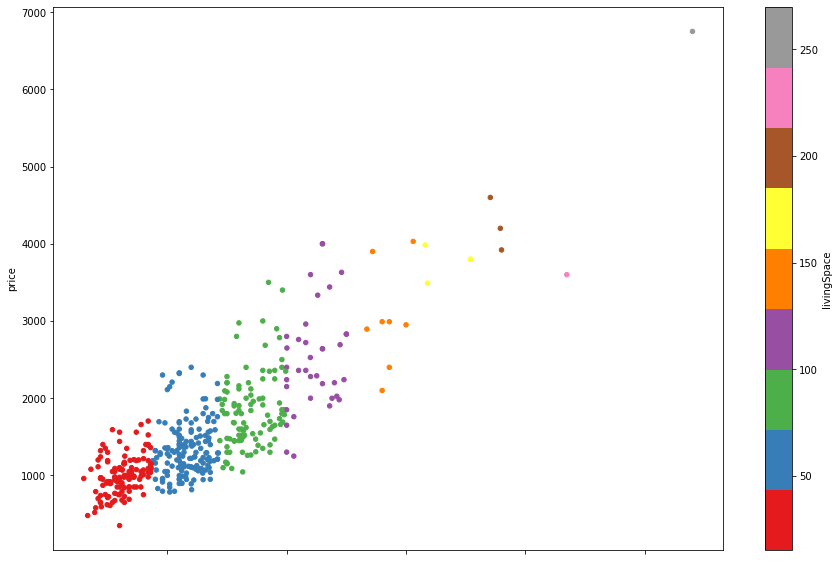

In [47]:
draw_city_totalarea("München")

In [48]:
df_price_square=df_total[['city','price','livingSpace']].groupby("city").mean()

In [49]:
df_price_square["euro/meter square"] = df_price_square["price"].div(df_price_square["livingSpace"].values)


In [50]:
df_price_square.head()

,price,livingSpace,euro/meter square
city,,,
Aachen,673.770769,61.704505,10.919312
Aachen (Kreis),470.127073,65.077927,7.224063
Ahrweiler (Kreis),620.000000,78.847500,7.863280
Aichach-Friedberg (Kreis),870.899231,78.386923,11.110262
Alb-Donau-Kreis,690.511000,65.981000,10.465301


In [51]:
df_price_square[['euro/meter square']].sort_values(by=["euro/meter square"], ascending=False)

,euro/meter square
city,
Miesbach (Kreis),32.506787
Nordfriesland (Kreis),27.884071
München,23.712543
München (Kreis),21.109188
Garmisch-Partenkirchen (Kreis),20.588235
...,...
Donnersbergkreis,4.400000
Lüchow-Dannenberg (Kreis),4.113930
Kusel (Kreis),3.659574


In [52]:
df_total_2=df_total[df_total['city']=="Passau"]

In [53]:
df_total_2.head()

,ID,url,creation,Haus/Wohnung,address,city,postcode,quarter,firstname,lastname,...,livingSpace,balcony,builtInKitchen,garden,price,privateOffer,floorplan,Warm_miete,lat,lon
10590,59739917,https://www.immobilienscout24.de/expose/59739917,2022-01-12T14:39:54.000+01:00,Wohnung,"Drosselweg 6, Neustift, Passau",Passau,94036,Heining,Stephan,Mühlberger,...,45.32,True,True,False,405.00,False,True,497 EUR/MONTH,48.57449,13.38625
12925,131259277,https://www.immobilienscout24.de/expose/131259277,2022-01-11T16:44:48.000+01:00,Wohnung,"Söldenpeterweg 31, Haidenhof Nord, Passau",Passau,94036,Haidenhof Nord,Birgit,Freund,...,83.00,True,False,True,750.00,False,True,935 EUR/MONTH,48.56369,13.42051
14586,131253632,https://www.immobilienscout24.de/expose/131253632,2022-01-11T08:40:33.000+01:00,Wohnung,"Innstraße 82 b, Haidenhof Süd, Passau",Passau,94036,Haidenhof Süd,Annalena,Dangl,...,47.00,True,True,False,400.00,False,True,540 EUR/MONTH,48.56156,13.44213
17192,131237886,https://www.immobilienscout24.de/expose/131237886,2022-01-10T10:08:53.000+01:00,Wohnung,"Spitalhofstraße 27, Haidenhof Nord, Passau",Passau,94032,Haidenhof Nord,Immobilienanbieter,Dreiburgenland Management GmbH,...,54.00,False,False,False,408.00,False,False,503 EUR/MONTH,48.57106,13.44121
22683,97759965,https://www.immobilienscout24.de/expose/97759965,2022-01-06T15:39:59.000+01:00,Wohnung,"Königsberger Straße 20, Haidenhof Nord, Passau",Passau,94036,Haidenhof Nord,Wolfgang,Hartl Verwaltungs GmbH und Co. KG,...,87.90,True,True,False,729.57,False,True,947.21 EUR/MONTH,48.56248,13.41611


In [54]:
m = folium.Map(location=[48.566846, 13.436720], zoom_start=13, tiles="Stamen Terrain")

tooltip = "Click me!"

for index,row in enumerate(df_total_2.itertuples()):
    html='''{0}. <a target="_blank" href="{1}">{2}</a> </br>
    {3} </br>
    Price: {4:.2f} euro '''.format(index, row.url, row.title, row.address, row.price)
    folium.Marker([row.lat, row.lon], popup=html, tooltip=tooltip).add_to(m)

m

## House Rent

In [55]:
path = os.path.join(os.getcwd(), "Data/House/Rent/")
list_of_files = glob.glob(f"{path}/*.csv") 

In [56]:
list_df = []

for filename in list_of_files:
    df = pd.read_csv(filename, sep=";",index_col=None, header=0)
    list_df.append(df)

df_total = pd.concat(list_df, axis=0, ignore_index=True)

In [57]:
df_total.head()

,ID,url,creation,Haus/Wohnung,address,city,postcode,quarter,firstname,lastname,...,numberOfRooms,livingSpace,plotArea,builtInKitchen,price,privateOffer,Warm_miete,lat,lon,floorplan
0,131378238,https://www.immobilienscout24.de/expose/131378238,2022-01-16T21:44:07.202+01:00,Haus,"Bahnhofstr. 3, Bad Brückenau, Bad Kissingen (K...",Bad Kissingen (Kreis),97769,Bad Brückenau,Wenzhe,Yang,...,15.0,900.00,550.0,True,10000 EUR,True,10000 EUR/MONTH,50.3073,9.78668,False
1,127574369,https://www.immobilienscout24.de/expose/127574369,2022-01-16T21:36:39.000+01:00,Haus,"Theodor-Storm-Str. 19 b+c, Wahlstedt, Segeberg...",Segeberg (Kreis),23812,Wahlstedt,Tanja,Sommet,...,5.0,110.00,195.0,True,1200 EUR,True,1600 EUR/MONTH,53.95785,10.19899,False
2,131091224,https://www.immobilienscout24.de/expose/131091224,2022-01-16T21:34:12.000+01:00,Haus,"Münster, Darmstadt-Dieburg (Kreis)",Darmstadt-Dieburg (Kreis),64839,Münster,M,Schültje,...,7.0,198.54,620.0,True,1880 EUR,True,2300 EUR/MONTH,no value,no value,False
3,131382015,https://www.immobilienscout24.de/expose/131382015,2022-01-16T21:18:54.309+01:00,Haus,"Grefrath, Viersen (Kreis)",Viersen (Kreis),47929,Grefrath,Rita,Fuga-Rosenberg,...,2.0,130.00,200.0,False,450 EUR,True,649 EUR/MONTH,no value,no value,False
4,131382309,https://www.immobilienscout24.de/expose/131382309,2022-01-16T21:16:15.008+01:00,Haus,"Amöneburg, Marburg-Biedenkopf (Kreis)",Marburg-Biedenkopf (Kreis),35287,Amöneburg,stefan,schick,...,7.0,210.00,900.0,True,1800 EUR,True,2000 EUR/MONTH,no value,no value,False


In [58]:
df_total.columns

Index(['ID', 'url', 'creation', 'Haus/Wohnung', 'address', 'city', 'postcode',
       'quarter', 'firstname', 'lastname', 'phoneNumber', 'company', 'title',
       'numberOfRooms', 'livingSpace', 'plotArea', 'builtInKitchen', 'price',
       'privateOffer', 'Warm_miete', 'lat', 'lon', 'floorplan'],
      dtype='object')

In [59]:
for i in list(df_total.columns):
    df_total=df_total[df_total[i]!="no value"]

In [60]:
df_total.groupby("city").size().sort_values(ascending=False)


city
Berlin                     8
Köln                       6
Leipzig                    6
Dahme-Spreewald (Kreis)    6
München (Kreis)            6
                          ..
Heidekreis                 1
Havelland (Kreis)          1
Görlitz                    1
Göppingen (Kreis)          1
Zwickau (Kreis)            1
Length: 163, dtype: int64

In [61]:
df_total.groupby("company").size().sort_values(ascending=False)


company
Inseriert auf ohne-makler.net                                  19
Vaduz Lichtenstein Immobilien Holding GmbH                     10
Müller Merkle Immobilien GmbH                                   5
ProSolva GmbH                                                   4
Larsen Immobilien                                               4
                                                               ..
Hilde Leupolz -Immobilien und Vermietungen-                     1
Hohl Immobilien GmbH                                            1
HÜBSCHER Immobilien GmbH                                        1
Hölscher Hausverwaltung-Immobilien IVD                          1
Jäger Immobilien GbR /Angelika Jäger-Kortmann u. Marc Jäger     1
Length: 228, dtype: int64

In [62]:
df_total['price']=df_total['price'].apply(lambda x: float(x.split(" EUR")[0]))

In [63]:
df_total.dropna(inplace=True)

In [64]:
def draw_city_totalarea(city):
    df3=df_total[df_total['city']==city]
    df3.plot(x="livingSpace", y="price", c="livingSpace", kind="scatter", colormap=cm.Set1, figsize=(15,10))

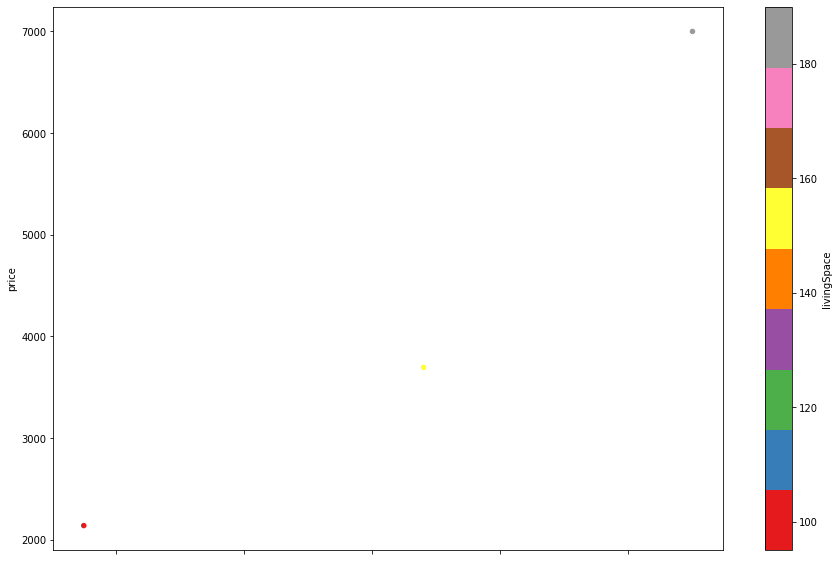

In [65]:
draw_city_totalarea("München")

In [66]:
df_price_square=df_total[['city','price','livingSpace']].groupby("city").mean()

In [67]:
df_price_square["euro/meter square"] = df_price_square["price"].div(df_price_square["livingSpace"].values)


In [68]:
df_price_square.head()

,price,livingSpace,euro/meter square
city,,,
Aachen (Kreis),1400.0,148.8,9.408602
Aichach-Friedberg (Kreis),2230.0,189.0,11.798942
Altenkirchen (Westerwald) (Kreis),850.0,125.0,6.800000
Altmarkkreis Salzwedel,720.0,130.0,5.538462
Augsburg (Kreis),1630.0,143.5,11.358885


In [69]:
df_price_square[['euro/meter square']].sort_values(by=["euro/meter square"], ascending=False)

,euro/meter square
city,
Nordfriesland (Kreis),48.387097
München,29.639723
Düsseldorf,22.029343
Hamburg,17.697212
Frankfurt am Main,17.254408
...,...
Görlitz (Kreis),1.538824
Mittelsachsen (Kreis),1.000000
Burgenlandkreis,0.500000


In [70]:
df_total_2=df_total[df_total['city']=="München"]

In [71]:
df_total_2.head()

,ID,url,creation,Haus/Wohnung,address,city,postcode,quarter,firstname,lastname,...,numberOfRooms,livingSpace,plotArea,builtInKitchen,price,privateOffer,Warm_miete,lat,lon,floorplan
1370,131191243,https://www.immobilienscout24.de/expose/131191243,2022-01-05T19:00:55.000+01:00,Haus,"Clemens-Krauß-Straße -, Obermenzing, München",München,81247,Obermenzing,Privat von,A. Lehmann,...,8.0,190.0,400.0,True,7000.0,False,7500 EUR/MONTH,48.15959,11.4656,True
2183,130871249,https://www.immobilienscout24.de/expose/130871249,2021-12-08T17:10:04.000+01:00,Haus,"Josef-Mohr-Weg 39, Ramersdorf, München",München,81735,Perlach,Gavin,Carey,...,4.0,95.0,1.0,False,2139.0,False,2300 EUR/MONTH,48.11091,11.6255,False
2777,128059939,https://www.immobilienscout24.de/expose/128059939,2021-10-26T09:04:19.000+02:00,Haus,"Sebastian-Bauer-Str. 5c, Altperlach, München",München,81737,Perlach,Stefan,Reithmayer,...,5.0,148.0,80.0,True,3695.0,False,4040 EUR/MONTH,48.09933,11.63034,True


In [74]:
m = folium.Map(location=[48.129723, 11.519482], zoom_start=11, tiles="Stamen Terrain")

tooltip = "Click me!"

for index,row in enumerate(df_total_2.itertuples()):
    html='''{0}. <a target="_blank" href="{1}">{2}</a> </br>
    {3} </br>
    Price: {4:.2f} euro '''.format(index, row.url, row.title, row.address, row.price)
    folium.Marker([row.lat, row.lon], popup=html, tooltip=tooltip).add_to(m)

m